# Задача 2. Сравнение методов классификации

### Выполнил Зиннатулин Тимур Раифович, группа 22.М04

Выполнены все задачи:
- Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.
- Взять данные для предсказания заболеваний сердца тут (целевой признак для предсказания --- target). Демо блакнот с анализом этих данных можно найти тут.
- Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).
- Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
- При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).
- Используя подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.
- Повторить предыдущий пункт для библиотечных реализаций (например, из sklearn) всех пройденных методов классификации (logistic regression, svm, knn, naive bayes, decision tree).
- Сравнить все обученные модели, построить их confusion matrices. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.
* (+2 балла) Реализовать еще один из методов классификации и добавить его в сравнение.
* (+2 балла) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

## 1. Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.

In [1]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

'''
Метод логистической регрессии
'''
def logistic_regression(X, y, w, alpha, n_iters):
    '''
    Входные параметры:
    X - матрица объекты-признаки
    y - вектор правильных ответов
    alpha - шаг градиентного спуска
    num_iters - количество итераций градиентного спуска
    
    Возвращаемые значения:
    w - вектор весов
    '''

    '''Инициализация параметров'''
    m = y.size
    for i in range(n_iters):
        h = sigmoid(X.dot(w))
        J = (-1 / m) * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h)))
        grad = (1 / m) * X.T.dot(h - y)
        w = w - alpha * grad
    return w


## 2. Взять данные для предсказания заболеваний сердца [тут](https://github.com/rustam-azimov/ml-course/tree/main/data/heart_disease) (целевой признак для предсказания --- target). Демо блокнот с анализом этих данных можно найти [тут](https://github.com/rustam-azimov/ml-course/blob/main/practice/practice07_knn_nb/practice07_part02_classification_heart_disease_demo.ipynb).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
data = pd.read_csv('heart.csv')

## 3. Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Описание данных:
1. sex -- пол (1 = мужской, 0 = женский)
2. cp -- тип боли в груди (4 значения)
3. trestbps -- артериальное давление в состоянии покоя (в мм рт. ст. при поступлении в больницу)
4. chol -- уровень холестерина в сыворотке (мг/дл)
5. fbs -- уровень сахара в крови натощак > 120 мг/дл (1 = true; 0 = false)
6. restecg -- результаты электрокардиографии в состоянии покоя (значения 0,1,2)
7. thalach -- достигнутая максимальная частота сердечных сокращений
8. exang -- стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)
9. oldpeak -- депрессия ST, вызванная физической нагрузкой по сравнению с отдыхом
10. slope -- наклон пикового упражнения ST сегмента (значения 1,2,3)
11. ca -- количество крупных сосудов (0-3), окрашенных флуороскопией
12. thal -- 3 = нормальный; 6 = исправленный дефект; 7 = обратимый дефект
13. target -- наличие или отсутствие сердечного заболевания (0 = отсутствие, 1 = наличие)


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Чистка данных не нужна, так как:
- В данных нет пропусков
- В данных нет дубликатов

## 4. Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.

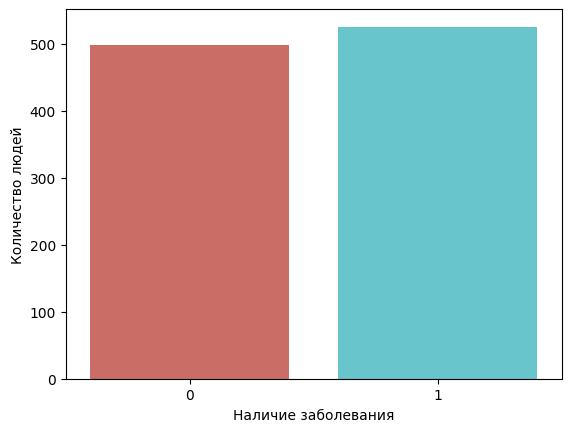

In [6]:
sns.countplot(x='target', data=data, palette='hls')
''' Подписи к осям'''
plt.xlabel('Наличие заболевания')
plt.ylabel('Количество людей')
plt.show()

По графику целевой переменной видно, что людей с заболеванием сердца больше, чем без него
- Это может быть полезно при дальнейшем решении задачи классификации.

Построим график зависимости целевой переменной от признака "пол"

In [7]:
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


- Заболевание сердца чаще встречается у мужчин, чем у женщин

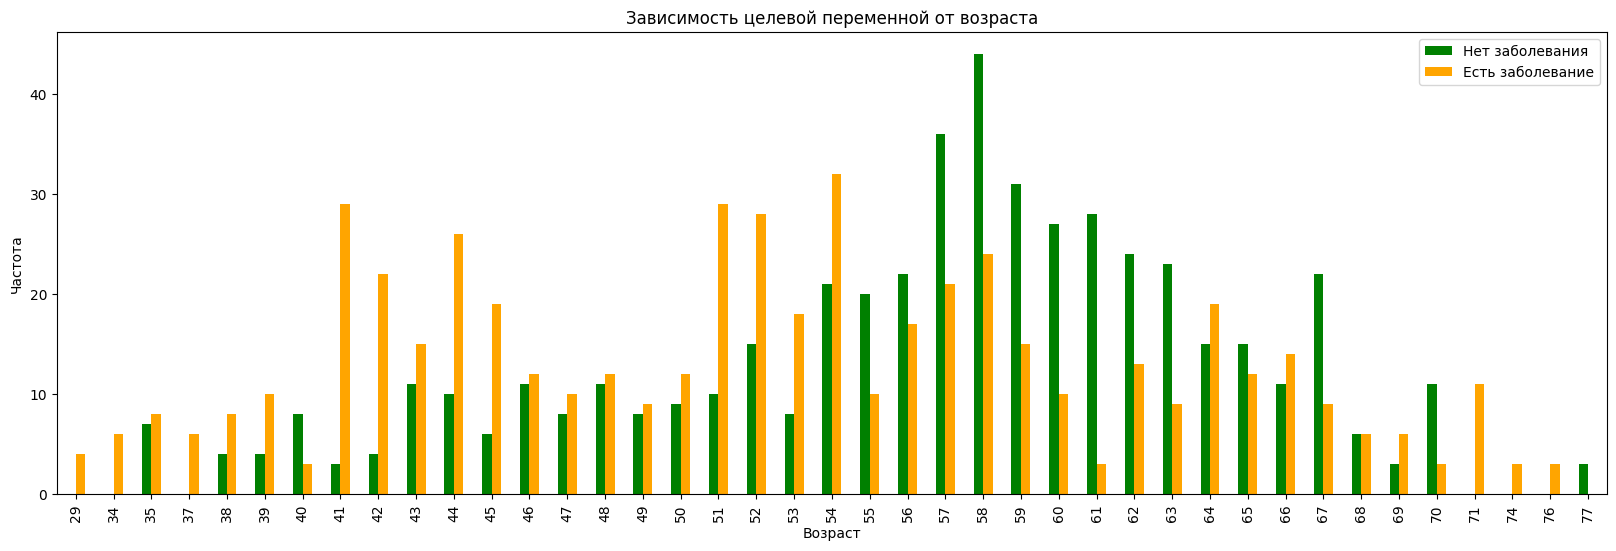

In [8]:
pd.crosstab(data.age, data.target).plot(kind="bar", figsize=(20, 6), color=['green','orange'])
plt.title('Зависимость целевой переменной от возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.legend(["Нет заболевания", "Есть заболевание"])
plt.show()

- Из графика видно, что у людей от 40 до 60 лет чаще всего встречается заболевание сердца
- А после 60 лет заболевание сердца становится реже

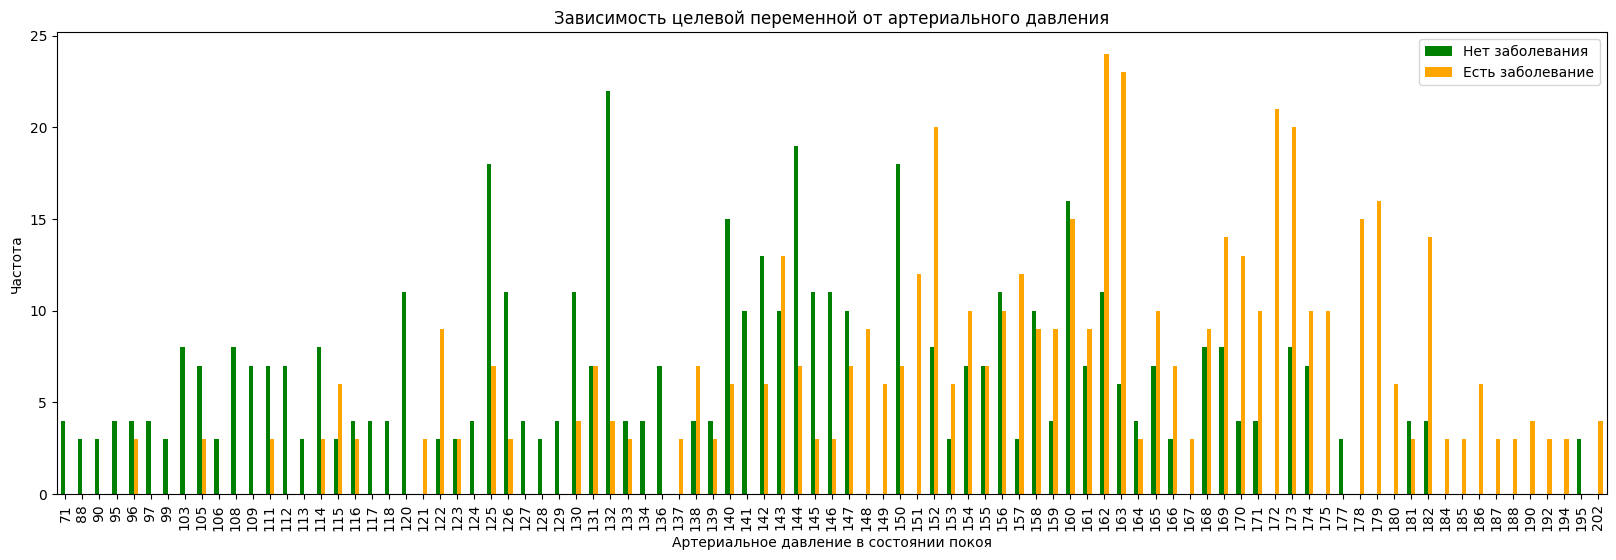

In [9]:
'''График зависимости целевой переменной от артериального давления'''
pd.crosstab(data.thalach, data.target).plot(kind="bar", figsize=(20, 6), color=['green','orange'])
plt.title('Зависимость целевой переменной от артериального давления')
plt.xlabel('Артериальное давление в состоянии покоя')
plt.ylabel('Частота')
plt.legend(["Нет заболевания", "Есть заболевание"])
plt.show()


- Из графика зависимости целевой переменной от артериального давления видно, что чем выше артериальное давление, тем чаще встречается заболевание сердца

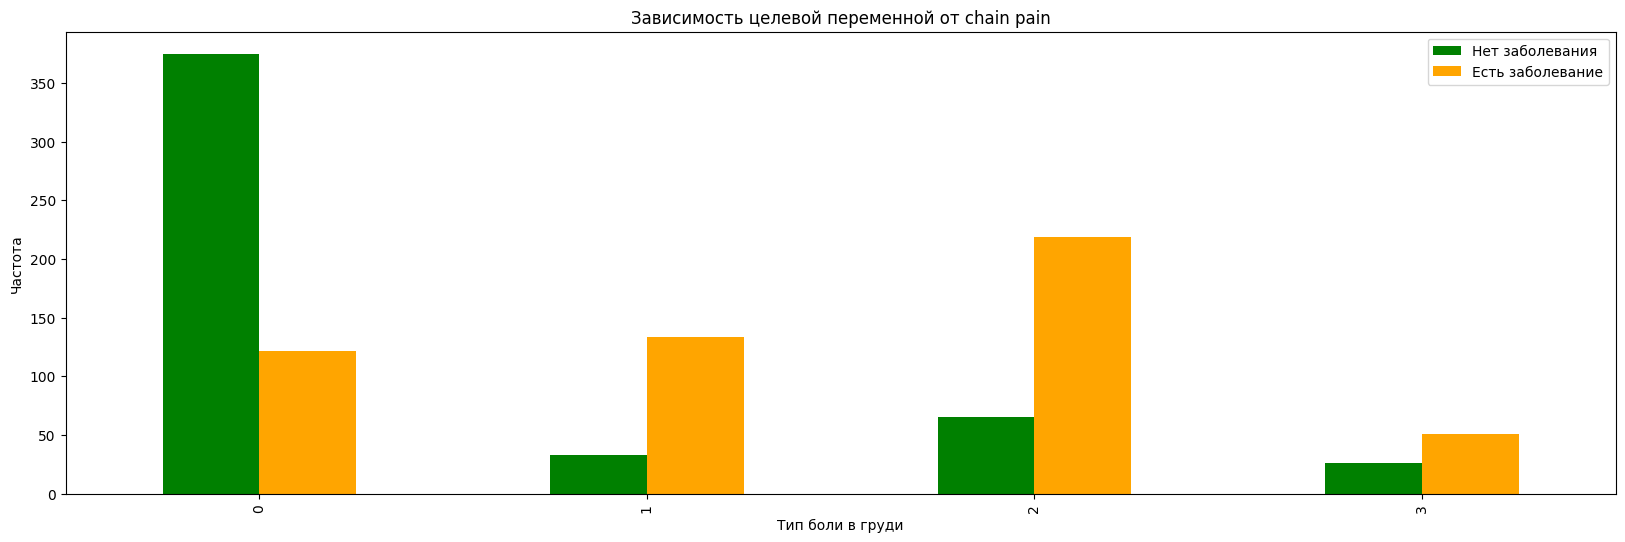

In [10]:
'''График зависимости целевой переменной от chain pain'''
pd.crosstab(data.cp, data.target).plot(kind="bar", figsize=(20, 6), color=['green','orange'])
plt.title('Зависимость целевой переменной от chain pain')
plt.xlabel('Тип боли в груди')
plt.ylabel('Частота')
plt.legend(["Нет заболевания", "Есть заболевание"])
plt.show()

- Можно сделать вывод, что чаще всего встречается заболевание у людей с типом боли в груди 2

Выводы по разведочному анализу:
- Заболевание сердца чаще встречается у мужчин, чем у женщин
- Чаще всего встречается заболевание у людей с типом боли в груди 2
- Чаще всего встречается заболевание у людей с артериальным давлением 150-180
- Чаще всего встречается заболевание у людей от 40 до 60 лет

## 5. При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering)

In [11]:
X = data.drop(['target'], axis=1)
y = data['target']

Удалим ненужные признаки, выполнив RFE

In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, n_features_to_select=6)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

'''Печать выбранных признаков'''
print(X.columns[rfe.support_])

'''Удаление ненужных признаков'''
X = X.drop(['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'oldpeak'], axis=1)


[False  True  True False False False False False  True False  True  True
  True]
[7 1 1 6 8 4 3 5 1 2 1 1 1]
Index(['sex', 'cp', 'exang', 'slope', 'ca', 'thal'], dtype='object')


## 6. Используя подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.

In [13]:
'''Разделение данных на обучающую и тестовую выборки'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
'''Подбор гиперпараметров для нашей реализации logistic_regression alpha and n_inter'''
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

alphas = [0.000001, 0.00001, 0.0001, 0.001]
n_iters = [100, 1000, 10000]

best_alpha = 0
best_n_iter = 0
best_score = 0

for alpha in alphas:
    for n_iter in n_iters:
        w = np.zeros(X_train.shape[1])
        w = logistic_regression(X_train, y_train, w, alpha, n_iter)
        y_pred = sigmoid(np.dot(X_test, w))
        y_pred = np.where(y_pred > 0.5, 1, 0)

        currScore = accuracy_score(y_test, y_pred)

        if  currScore > best_score:
            best_score = currScore
            best_alpha = alpha
            best_n_iter = n_iter

print(f'best alpha: {best_alpha}, best n_iter: {best_n_iter}, best accuracy: {best_score}')

best alpha: 0.001, best n_iter: 10000, best accuracy: 0.8780487804878049


In [15]:
class MyLogisticRegression:
    def __init__(self, alpha=0.0001, n_iter=100):
        self.alpha = alpha
        self.n_iter = n_iter
        self.w = None

    def fit(self, X, y):
        w = np.zeros(X.shape[1])
        self.w = logistic_regression(X, y, w, self.alpha, self.n_iter)

    def predict(self, X):
        y_pred = sigmoid(np.dot(X, self.w))
        y_pred = np.where(y_pred > 0.5, 1, 0)
        return y_pred
        
    def get_params(self, deep=True):
        return {'alpha': self.alpha, 'n_iter': self.n_iter}
    
    def set_params(self, alpha, n_iter):
        self.alpha = alpha
        self.n_iter = n_iter
        return self
    

In [16]:
'''Кросс валидация для нашей реализации logistic_regression'''
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=0)

scores = []
alpha = best_alpha
n_iter = best_n_iter

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = MyLogisticRegression(alpha=alpha, n_iter=n_iter)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    scores.append(accuracy_score(y_test, y_pred))

print(f'accuracy: {np.mean(scores)}')

accuracy: 0.8126829268292683


In [17]:
'''Масшатбирование данных'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = MyLogisticRegression(alpha=best_alpha, n_iter=best_n_iter)
model.fit(X_train_scaled, y_train)
y_pred_my_lr = model.predict(X_test_scaled)

print(f'accuracy: {accuracy_score(y_test, y_pred_my_lr)}')

accuracy: 0.7902439024390244


Удалось достичь результата 0.7902 на тестовой выборке с масштабированными данными.

## 7. Повторить предыдущий пункт для библиотечных реализаций (например, из sklearn) всех пройденных методов классификации (logistic regression, svm, knn, naive bayes, decision tree).

### 7.1. Logistic Regression

In [18]:
'''LogisticRegression из sklearn'''
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(f'accuracy: {accuracy_score(y_test, y_pred)}')

accuracy: 0.8


In [19]:
'''Подбор гиперпараметров для LogisticRegression из sklearn'''
from sklearn.model_selection import GridSearchCV
params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
model = LogisticRegression()
grid = GridSearchCV(model, params)
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)
y_pred_sklearn_lr = grid.predict(X_test_scaled)
print(f'accuracy: {accuracy_score(y_test, y_pred_sklearn_lr)}')

{'C': 0.001, 'penalty': 'l2'}
accuracy: 0.8


In [20]:
'''kross validation для LogisticRegression из sklearn'''
from sklearn.model_selection import cross_val_score
model = LogisticRegression(C=0.1, penalty='l2')
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f'accuracy: {np.mean(scores)}')

accuracy: 0.828048780487805


### 7.2. SVM

In [21]:
'''SVM из sklearn'''
from sklearn.svm import SVC
model = SVC()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(f'accuracy: {accuracy_score(y_test, y_pred)}')

accuracy: 0.8829268292682927


In [22]:
'''Подбор гиперпараметров для SVM из sklearn'''
params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
model = SVC()
grid = GridSearchCV(model, params)
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)
y_pred_sklearn_svm = grid.predict(X_test_scaled)
print(f'accuracy: {accuracy_score(y_test, y_pred_sklearn_svm)}')

{'C': 1000, 'kernel': 'rbf'}
accuracy: 0.9804878048780488


In [23]:
'''kross validation для SVM из sklearn'''
model = SVC(C=0.1, kernel='rbf')
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f'accuracy: {np.mean(scores)}')

accuracy: 0.8682926829268294


### 7.3. KNN

In [24]:
'''KNN из sklearn'''
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(f'accuracy: {accuracy_score(y_test, y_pred)}')

accuracy: 0.8439024390243902


In [25]:
'''Подбор гиперпараметров для KNN из sklearn'''
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform', 'distance']}
model = KNeighborsClassifier()
grid = GridSearchCV(model, params)
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)
y_pred_sklearn_knn = grid.predict(X_test_scaled)
print(f'accuracy: {accuracy_score(y_test, y_pred_sklearn_knn)}')

{'n_neighbors': 9, 'weights': 'distance'}
accuracy: 1.0


In [26]:
'''kross validation для KNN из sklearn'''
model = KNeighborsClassifier(n_neighbors=5, weights='uniform')
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f'accuracy: {np.mean(scores)}')

accuracy: 0.8414634146341463


### 7.4. Naive Bayes

In [27]:
'''Naive Bayes из sklearn'''
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(f'accuracy: {accuracy_score(y_test, y_pred)}')

accuracy: 0.7853658536585366


In [28]:
'''Подбор гиперпараметров для Naive Bayes из sklearn'''
params = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]}
model = GaussianNB()
grid = GridSearchCV(model, params)
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)
y_pred_sklearn_bayes = grid.predict(X_test_scaled)
print(f'accuracy: {accuracy_score(y_test, y_pred_sklearn_bayes)}')

{'var_smoothing': 1e-09}
accuracy: 0.7853658536585366


In [29]:
'''kross validation для Naive Bayes из sklearn'''
model = GaussianNB(var_smoothing=1e-09)
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f'accuracy: {np.mean(scores)}')

accuracy: 0.828048780487805


### 7.5. Decision Tree

In [30]:
'''Decision Tree из sklearn'''
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(f'accuracy: {accuracy_score(y_test, y_pred)}')

accuracy: 1.0


In [31]:
'''Подбор гиперпараметров для Decision Tree из sklearn'''
params = {'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
model = DecisionTreeClassifier()
grid = GridSearchCV(model, params)
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)
y_pred_sklearn_tree = grid.predict(X_test_scaled)
print(f'accuracy: {accuracy_score(y_test, y_pred_sklearn_tree)}')

{'criterion': 'gini', 'max_depth': 10}
accuracy: 0.9951219512195122


In [32]:
'''kross validation для Decision Tree из sklearn'''
model = DecisionTreeClassifier(criterion='gini', max_depth=5)
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f'accuracy: {np.mean(scores)}')

accuracy: 0.8621951219512194


## 8. Сравнить все обученные модели, построить их confusion matrices. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.

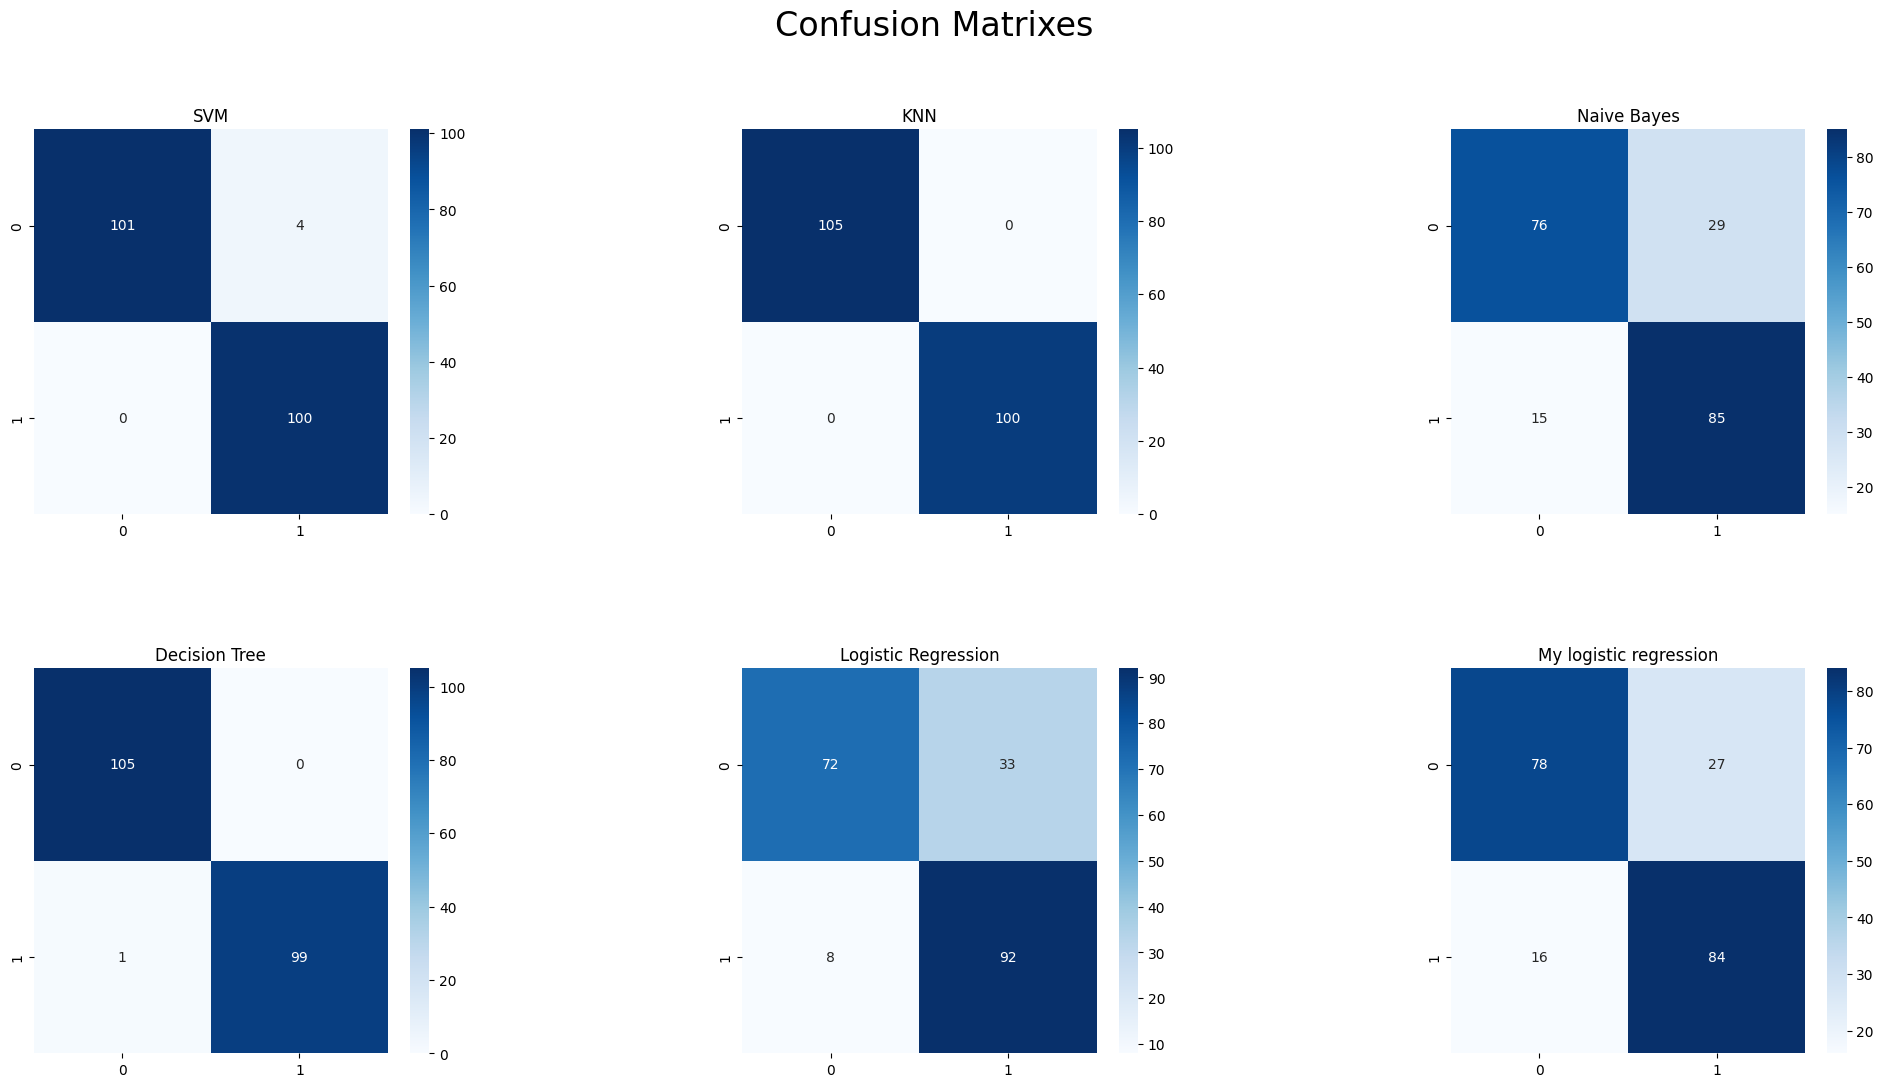

In [33]:
'''Confusuin Matrix для всех рассмотренных методов'''
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrixes", fontsize=24)
plt.subplots_adjust(wspace = 0.6, hspace= 0.4)

plt.subplot(2, 3, 1)
plt.title("SVM")
sns.heatmap(confusion_matrix(y_test, y_pred_sklearn_svm), cmap="Blues", annot=True, fmt="d")

plt.subplot(2, 3, 2)
plt.title("KNN")
sns.heatmap(confusion_matrix(y_test, y_pred_sklearn_knn), cmap='Blues', annot=True, fmt='d')

plt.subplot(2, 3, 3)
plt.title("Naive Bayes")
sns.heatmap(confusion_matrix(y_test, y_pred_sklearn_bayes), cmap='Blues', annot=True, fmt='d')

plt.subplot(2, 3, 4)
plt.title("Decision Tree")
sns.heatmap(confusion_matrix(y_test, y_pred_sklearn_tree), cmap='Blues', annot=True, fmt='d')

plt.subplot(2, 3, 5)
plt.title("Logistic Regression")
sns.heatmap(confusion_matrix(y_test, y_pred_sklearn_lr), cmap='Blues', annot=True, fmt='d')

plt.subplot(2, 3, 6)
plt.title("My logistic regression")
sns.heatmap(confusion_matrix(y_test, y_pred_my_lr), cmap='Blues', annot=True, fmt='d')

plt.show()

Выводы о полученных моделях:
- Лучше всего себя показали модели из sklearn: SVM, KNN и Decision Tree
- Моя реализация logistic regression показала результат немного хуже, чем реализация из sklearn, однако лучше, чем Naive Bayes из sklearn

## Дополнительное задание 1 (+2 балла). Реализовать еще один из методов классификации и добавить его в сравнение.

In [34]:
'''My implementation of SVM for classification'''
def svm(X, y, num_iters, lr, verbose=True):
    '''
    Входные данные:
        X - матрица объекты-признаки
        y - вектор ответов
        num_iters - число итераций градиентного спуска
        lr - learning rate
    Выходные данные:
        w - вектор весов
        b - смещение
    '''

    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    y_ = np.where(y <= 0, -1, 1)
    for i in range(1, num_iters + 1):
        for idx, x_i in enumerate(X):
            condition = y_[idx] * (np.dot(x_i, w) - b) >= 1
            if condition:
                w -= lr * (2 * 1 / i * w)
            else:
                w -= lr * (2 * 1 / i * w - np.dot(x_i, y_[idx]))
                b -= lr * y_[idx]
        if verbose and i % 100 == 0:
            print(f'iteration: {i}, num_iters: {num_iters}, lr: {lr}')
    return w, b                    

In [35]:
''' Class for my implementation of SVM for classification'''
class MySVM:
    def __init__(self, num_iters=1000, lr=0.001, verbose=False):
        self.num_iters = num_iters
        self.lr = lr
        self.w = None
        self.b = None
        self.verbose = verbose

    def fit(self, X, y):
        self.w, self.b = svm(X, y, self.num_iters, self.lr, self.verbose)

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        labels = np.sign(linear_output)
        return np.where(labels <= -1, 0, 1)
        
    def get_params(self, deep=True):
        return {'num_iters': self.num_iters, 'lr': self.lr}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

In [36]:
'''Подпор гиперпараметров для MySVM'''
from sklearn.model_selection import GridSearchCV
params = {'num_iters': [100, 1000, 2000], 'lr': [0.001, 0.01, 0.1]}
model = MySVM()
grid = GridSearchCV(model, params, scoring='accuracy')
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)
y_pred_my_svm = grid.predict(X_test_scaled)
print(f'accuracy: {accuracy_score(y_test, y_pred_my_svm)}')

{'lr': 0.001, 'num_iters': 100}
accuracy: 0.7853658536585366


In [37]:
'''Test for MySVM'''

model = MySVM(num_iters=100, lr=0.001)
model.fit(X_train_scaled, y_train)
y_pred_my_svm = model.predict(X_test_scaled)
print(f'accuracy: {accuracy_score(y_test, y_pred_my_svm)}')

accuracy: 0.7853658536585366


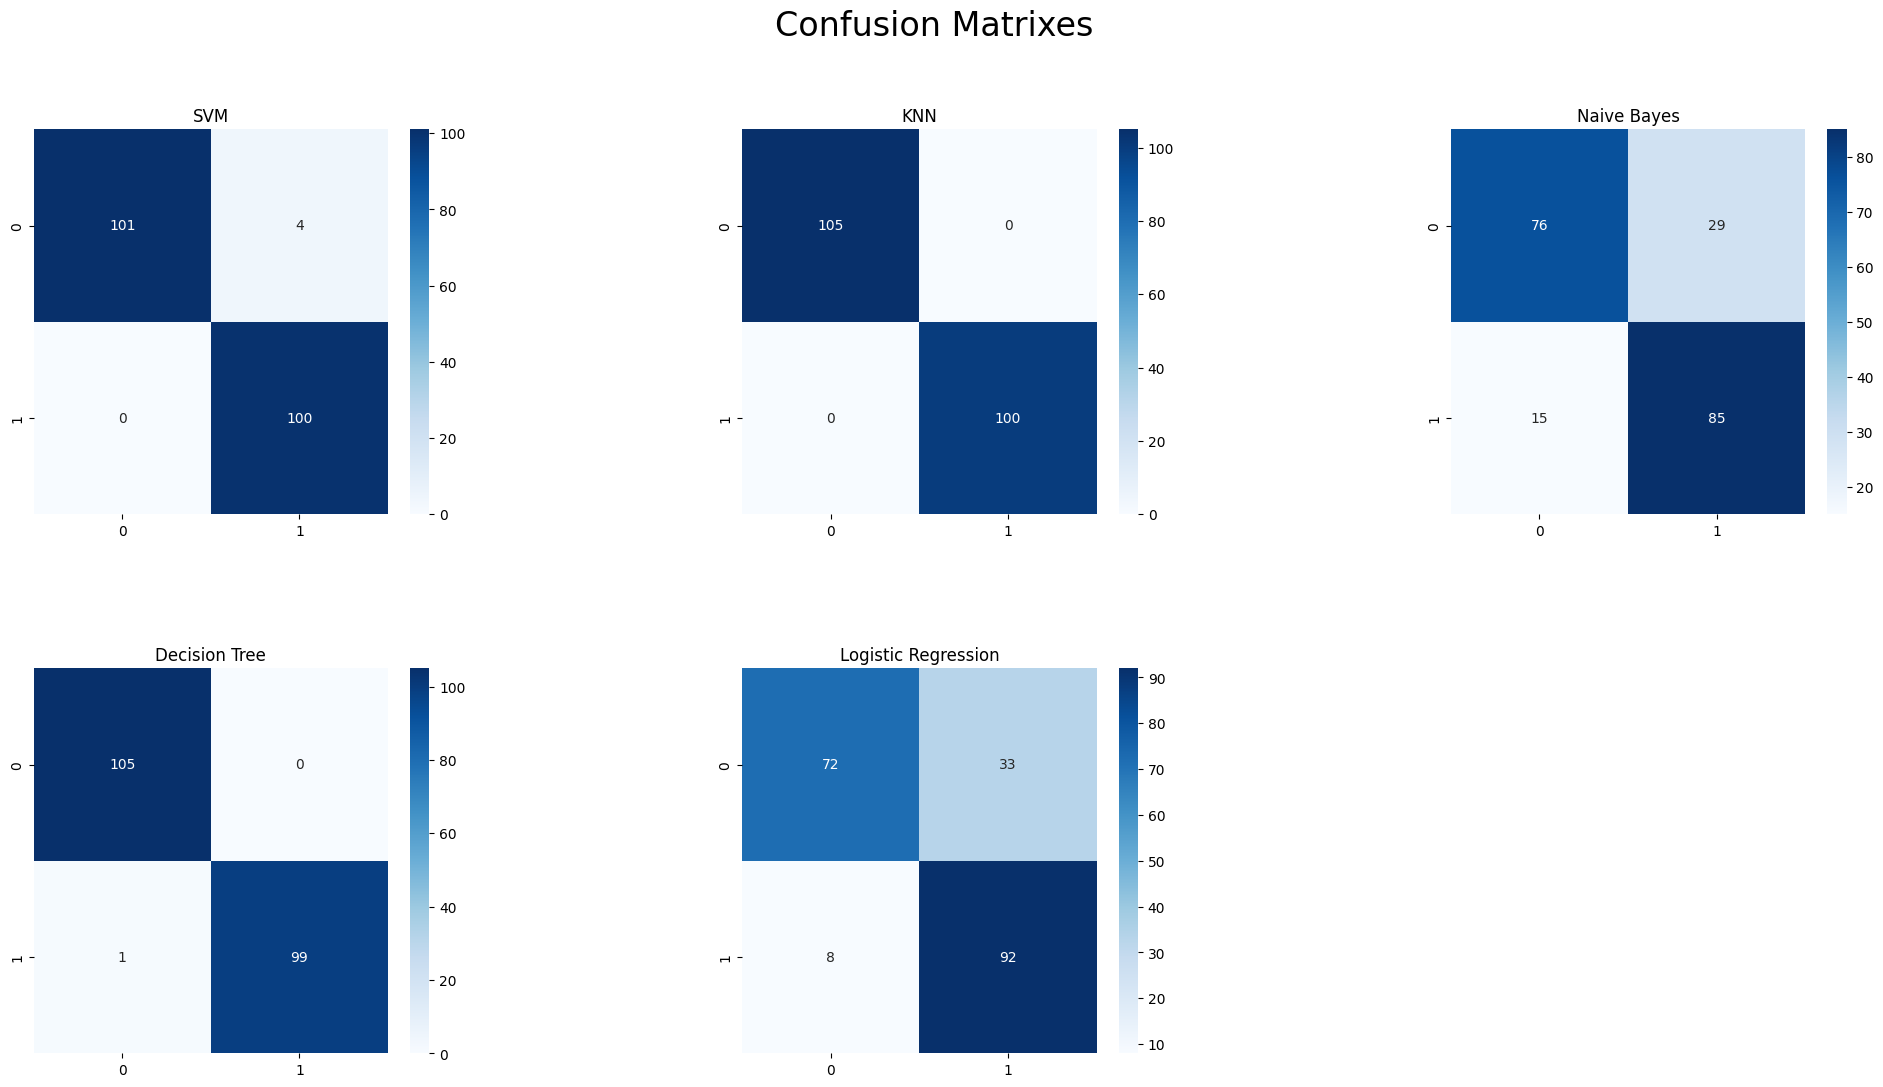

In [38]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrixes", fontsize=24)
plt.subplots_adjust(wspace = 0.6, hspace= 0.4)

plt.subplot(2, 3, 1)
plt.title("SVM")
sns.heatmap(confusion_matrix(y_test, y_pred_sklearn_svm), cmap="Blues", annot=True, fmt="d")

plt.subplot(2, 3, 2)
plt.title("KNN")
sns.heatmap(confusion_matrix(y_test, y_pred_sklearn_knn), cmap='Blues', annot=True, fmt='d')

plt.subplot(2, 3, 3)
plt.title("Naive Bayes")
sns.heatmap(confusion_matrix(y_test, y_pred_sklearn_bayes), cmap='Blues', annot=True, fmt='d')

plt.subplot(2, 3, 4)
plt.title("Decision Tree")
sns.heatmap(confusion_matrix(y_test, y_pred_sklearn_tree), cmap='Blues', annot=True, fmt='d')

plt.subplot(2, 3, 5)
plt.title("Logistic Regression")
sns.heatmap(confusion_matrix(y_test, y_pred_sklearn_lr), cmap='Blues', annot=True, fmt='d')

plt.show()

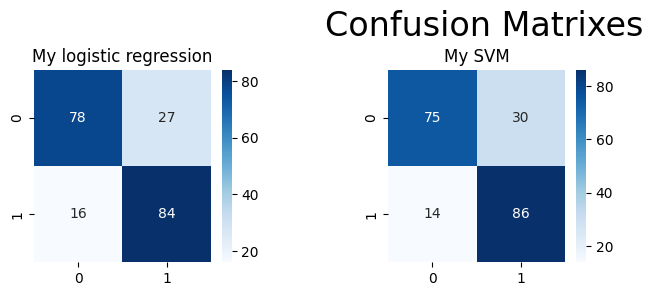

In [39]:
plt.figure(figsize=(12, 6))

plt.suptitle("Confusion Matrixes", fontsize=24)
plt.subplots_adjust(wspace = 0.6, hspace= 0.4)

plt.subplot(2, 3, 1)
plt.title("My logistic regression")
sns.heatmap(confusion_matrix(y_test, y_pred_my_lr), cmap='Blues', annot=True, fmt='d')

plt.subplot(2, 3, 2)
plt.title("My SVM")
sns.heatmap(confusion_matrix(y_test, y_pred_my_svm), cmap='Blues', annot=True, fmt='d')

plt.show()

- Моя реализация SVM показала результат немного хуже, чем реализация из sklearn
- Однако она показала результат лучше, чем реализация из sklearn Decision Tree

## Дополнительное задание 2 (+2 балла). Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

In [40]:
new_data = pd.read_csv('gender_classification.csv')
new_data.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [41]:
new_data.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,37,19,14,32,33


Описание данных:
- Всего 891 строк
- 12 признаков

1. Favorite color -- любимый цыет, категориальный признак
2. Favorite music genre -- любимый музыкальный жанр, категориальный признак
3. Favorite Deverage -- любимый алкогольный напиток напиток, категориальный признак
4. Favorite sott drink -- любимый безалкогольный напиток, категориальный признак
5. Gender -- пол, категориальный признак (целевой)

In [42]:
new_data.isnull().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

В данных нет пропусков

Для начала переведем все признаки в числовые значения

In [43]:
new_data['Favorite Color'].unique()

array(['Cool', 'Neutral', 'Warm'], dtype=object)

In [44]:
new_data['Favorite Music Genre'].unique()

array(['Rock', 'Hip hop', 'Folk/Traditional', 'Jazz/Blues', 'Pop',
       'Electronic', 'R&B and soul'], dtype=object)

In [45]:
new_data['Favorite Beverage'].unique()

array(['Vodka', 'Wine', 'Whiskey', "Doesn't drink", 'Beer', 'Other'],
      dtype=object)

In [46]:
new_data['Favorite Soft Drink'].unique()

array(['7UP/Sprite', 'Coca Cola/Pepsi', 'Fanta', 'Other'], dtype=object)

In [47]:
new_data['Favorite Color'] = new_data['Favorite Color'].map({'Cool': 0, 'Warm': 1, 'Neutral': 2})
new_data['Favorite Music Genre'] = new_data['Favorite Music Genre'].map({'Rock': 0, 'Hip hop': 1, 'Folk/Traditional': 2, 'Jazz/Blues': 3, 'Pop': 4, 'Electronic': 5, 'R&B and soul': 6})
new_data['Favorite Beverage'] = new_data['Favorite Beverage'].map({'Vodka': 0, 'Wine': 1, 'Whiskey': 2, 'Doesn\'t drink': 3, 'Beer': 4, 'Other': 5})
new_data['Favorite Soft Drink'] = new_data['Favorite Soft Drink'].map({'7UP/Sprite': 0, 'Coca Cola/Pepsi': 1, 'Fanta': 2, 'Other': 3})
new_data['Gender'] = new_data['Gender'].map({'M':0, 'F':1})

In [48]:
new_data.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,0,0,0,1
1,2,1,0,1,1
2,1,0,1,1,1
3,1,2,2,2,1
4,0,0,0,1,1


Построим график зависимости признаков

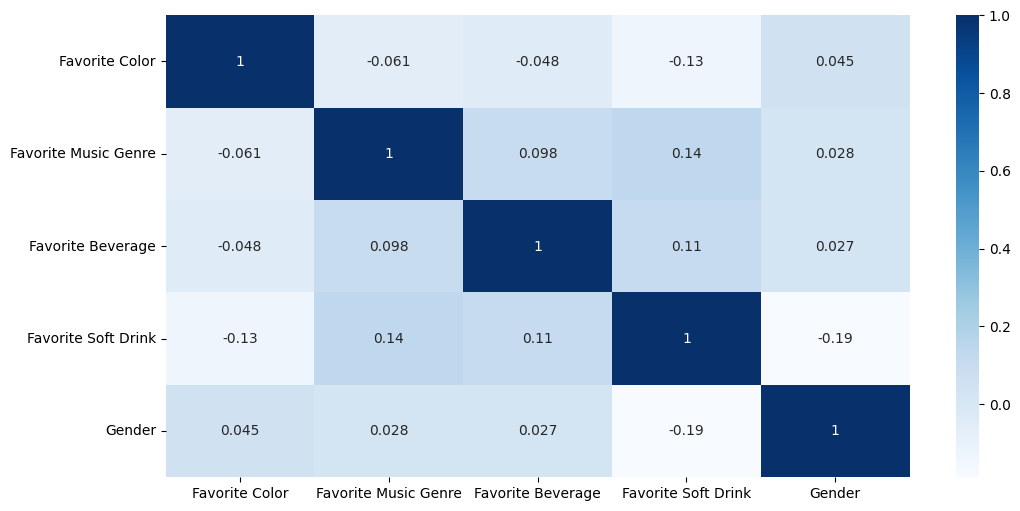

In [49]:
plt.figure(figsize=(12, 6))
sns.heatmap(new_data.corr(), annot=True, cmap='Blues')
plt.show()

Выводы:
- Сильнее всего коррелируют признаки Favorite Music Genre и Favorite Beverage
- Слабо коррелируют признаки Favorite Color и Favorite Soft Drink, а также Gender и Favorite Soft Drink

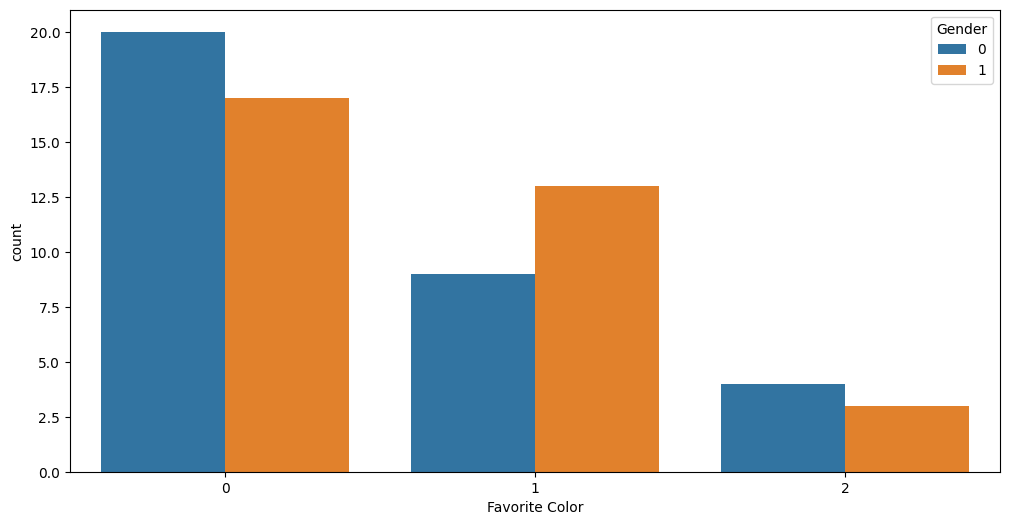

In [50]:
'''countplot gender and favorite color'''
plt.figure(figsize=(12, 6))
'''Подписи осей'''
sns.countplot(x='Favorite Color', hue='Gender', data=new_data)
plt.show()

Выводы:
- Цвета 1 (теплые) больше предпочитают мужчины
- Цвета 2 (холодные) больше предпочитают женщины


In [51]:
X = new_data.drop(['Gender'], axis=1)
y = new_data['Gender']

In [52]:
'''RFE'''
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, y)
print(f'Num Features: {fit.n_features_}')
print(f'Selected Features: {fit.support_}')

X = X.drop(['Favorite Soft Drink'], axis=1)


Num Features: 3
Selected Features: [ True False  True  True]


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
'''Logistic Regression'''
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred_lg = model.predict(X_test_scaled)
new_data_lg = accuracy_score(y_test, y_pred_lg)
print(f'accuracy: {new_data_lg}')

accuracy: 0.21428571428571427


In [56]:
'''GreidSearchCV and cross validation for Logistic Regression'''
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression()
grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train_scaled, y_train)
print(f'Best Score: {grid_result.best_score_} using {grid_result.best_params_}')

Best Score: 0.3922222222222223 using {'C': 0.001, 'penalty': 'l2'}


In [57]:
'''SVM'''
model = SVC()
model.fit(X_train_scaled, y_train)
y_pred_svm = model.predict(X_test_scaled)
new_data_svm = accuracy_score(y_test, y_pred_svm)
print(f'accuracy: {new_data_svm}')

accuracy: 0.42857142857142855


In [58]:
'''GreidSearchCV and cross validation for SVM'''
model = SVC()
grid = {'C': np.logspace(-3, 3, 7), 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train_scaled, y_train)
print(f'Best Score: {grid_result.best_score_} using {grid_result.best_params_}')

Best Score: 0.5355555555555556 using {'C': 10.0, 'kernel': 'rbf'}


In [59]:
'''KNN'''
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)
y_pred_knn = model.predict(X_test_scaled)
new_data_knn = accuracy_score(y_test, y_pred_knn)
print(f'accuracy: {new_data_knn}')

accuracy: 0.5714285714285714


In [60]:
'''GreidSearchCV and cross validation for KNN'''
model = KNeighborsClassifier()
grid = {'n_neighbors': np.arange(1, 20)}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train_scaled, y_train)
print(f'Best Score: {grid_result.best_score_} using {grid_result.best_params_}')

Best Score: 0.6366666666666668 using {'n_neighbors': 2}


In [61]:
'''Decision Tree'''
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)
y_pred_dt = model.predict(X_test_scaled)
new_data_dt = accuracy_score(y_test, y_pred_dt)
print(f'accuracy: {new_data_dt}')

accuracy: 0.5714285714285714


In [62]:
'''GreidSearchCV and cross validation for Decision Tree'''
model = DecisionTreeClassifier()
grid = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(1, 20)}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train_scaled, y_train)
print(f'Best Score: {grid_result.best_score_} using {grid_result.best_params_}')

Best Score: 0.6011111111111112 using {'criterion': 'gini', 'max_depth': 3}


In [63]:
'''Naive Bayes'''
model = GaussianNB()
model.fit(X_train_scaled, y_train)
y_pred_nb = model.predict(X_test_scaled)
new_data_nb = accuracy_score(y_test, y_pred_nb)
print(f'accuracy: {new_data_nb}')

accuracy: 0.21428571428571427


In [64]:
'''GreidSearchCV and cross validation for Naive Bayes'''
model = GaussianNB()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid={}, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train_scaled, y_train)
print(f'Best Score: {grid_result.best_score_}')

Best Score: 0.3633333333333333


In [65]:
'''GridSearchCV for MySVMGender'''
num_iters = [100, 1000, 10000]
lr = [0.001, 0.01, 0.1]
param_grid = {'num_iters': num_iters, 'lr': lr, 'verbose': [False]}
grid = GridSearchCV(MySVM(), param_grid, scoring='accuracy')
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)

{'lr': 0.01, 'num_iters': 100, 'verbose': False}


In [66]:
model = MySVM(num_iters=10000, lr=0.1, verbose=False)
model.fit(X_train_scaled, y_train)
y_pred_my_svm = model.predict(X_test_scaled)
new_data_my_svm = accuracy_score(y_test, y_pred_my_svm)
print(f'accuracy: {new_data_my_svm}')

accuracy: 0.2857142857142857


In [67]:
'''GridSearchCV for my logistic regression'''
num_iters = [100, 1000, 10000]
alpha = [0.001, 0.01, 0.1]
param_grid = {'n_iter': num_iters, 'alpha': alpha}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(MyLogisticRegression(), param_grid, scoring='accuracy', cv=cv)
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)

{'alpha': 0.001, 'n_iter': 1000}


In [68]:
model = MyLogisticRegression(n_iter=1000, alpha=0.001)
model.fit(X_train_scaled, y_train)
y_pred_my_logistic = model.predict(X_test_scaled)
new_data_my_logistic = accuracy_score(y_test, y_pred_my_logistic)
print(f'accuracy: {new_data_my_logistic}')

accuracy: 0.21428571428571427


Построим confusion matrices

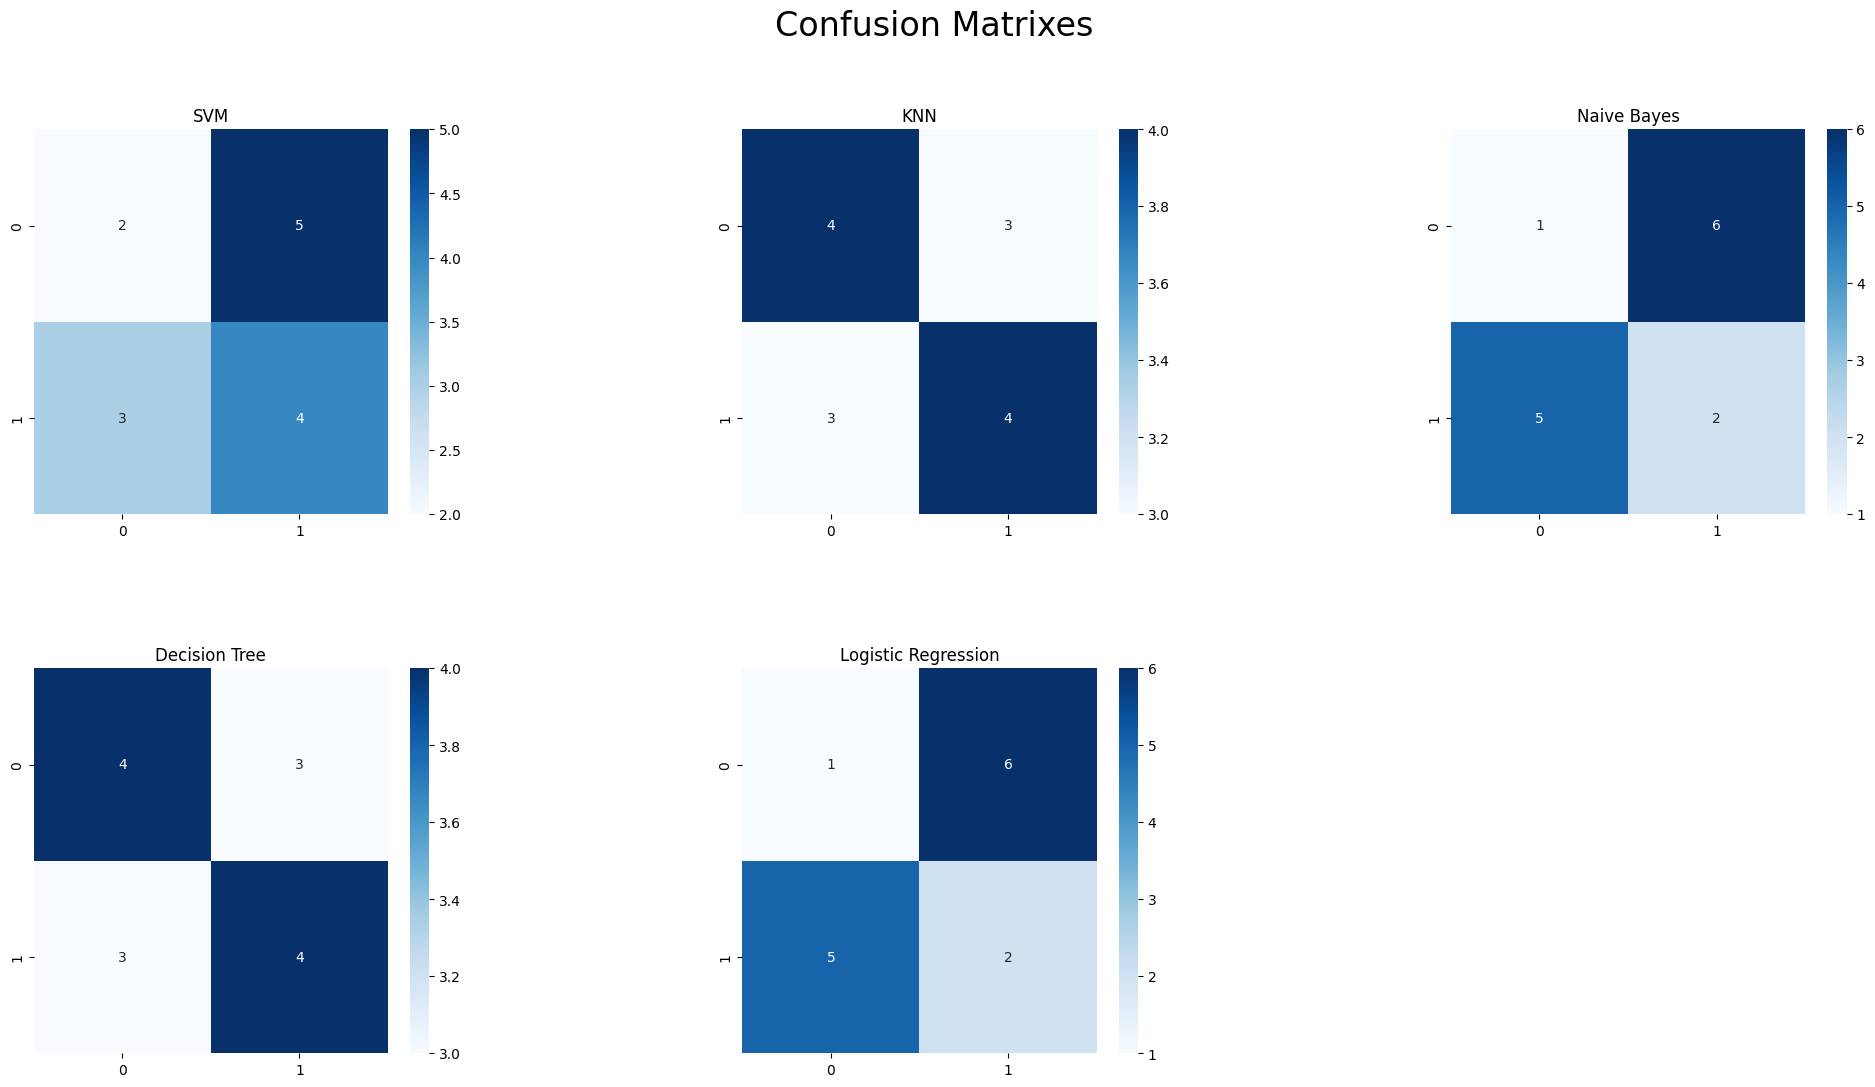

In [69]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrixes", fontsize=24)
plt.subplots_adjust(wspace = 0.6, hspace= 0.4)

plt.subplot(2, 3, 1)
plt.title("SVM")
sns.heatmap(confusion_matrix(y_test, y_pred_svm), cmap="Blues", annot=True, fmt="d")

plt.subplot(2, 3, 2)
plt.title("KNN")
sns.heatmap(confusion_matrix(y_test, y_pred_knn), cmap='Blues', annot=True, fmt="d")

plt.subplot(2, 3, 3)
plt.title("Naive Bayes")
sns.heatmap(confusion_matrix(y_test, y_pred_nb), cmap='Blues', annot=True, fmt="d")

plt.subplot(2, 3, 4)
plt.title("Decision Tree")
sns.heatmap(confusion_matrix(y_test, y_pred_dt), cmap='Blues', annot=True, fmt="d")

plt.subplot(2, 3, 5)
plt.title("Logistic Regression")
sns.heatmap(confusion_matrix(y_test, y_pred_lg), cmap='Blues', annot=True, fmt="d")

plt.show()

<AxesSubplot: title={'center': 'MyLogisticRegression'}>

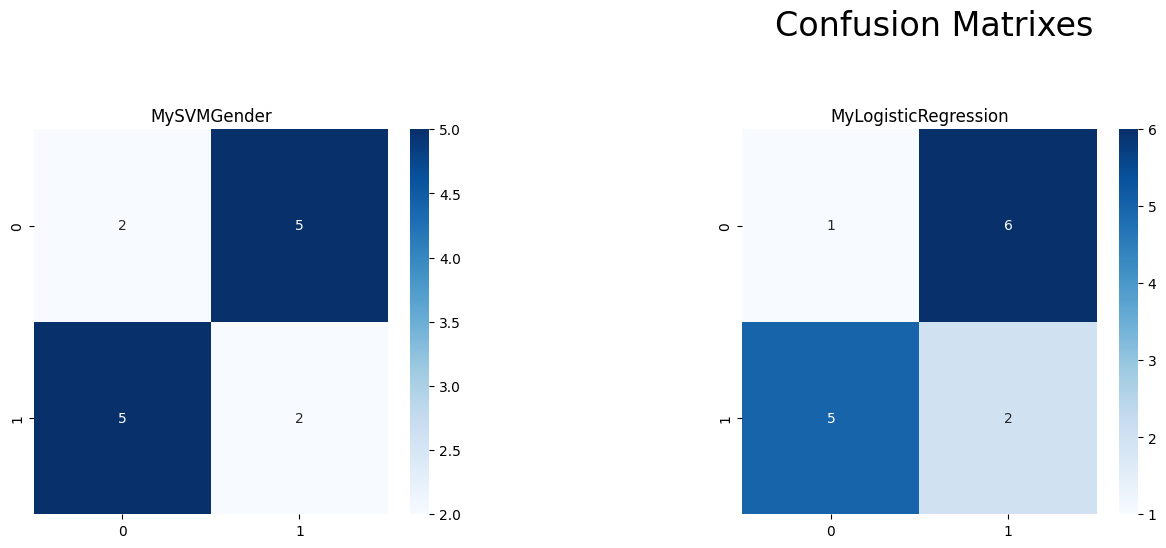

In [70]:
'''Confusion Matrixes for MySVMGender and MyLogisticRegression'''
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrixes", fontsize=24)
plt.subplots_adjust(wspace = 0.6, hspace= 0.4)

plt.subplot(2, 3, 1)
plt.title("MySVMGender")
sns.heatmap(confusion_matrix(y_test, y_pred_my_svm), cmap="Blues", annot=True, fmt="d")

plt.subplot(2, 3, 2)
plt.title("MyLogisticRegression")
sns.heatmap(confusion_matrix(y_test, y_pred_my_logistic), cmap='Blues', annot=True, fmt="d")


Выводы:
- Лучше всего себя показали модели из sklearn: SVM, KNN и Decision Tree
- Моя реализация logistic regression показала результат примерно такой же, как и реализация из sklearn